In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train_data=pd.read_csv('/kaggle/input/titanic/train.csv')
test_data=pd.read_csv('/kaggle/input/titanic/test.csv')


In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [7]:
train_data['Age'].fillna(train_data['Age'].median(),inplace=True)

/tmp/ipykernel_13/127112235.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Age'].fillna(train_data['Age'].median(),inplace=True)


In [8]:
test_data['Age'].fillna(test_data['Age'].median(),inplace=True)

/tmp/ipykernel_13/3330545753.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data['Age'].fillna(test_data['Age'].median(),inplace=True)


In [9]:
train_data["Embarked"].fillna(train_data['Embarked'].mode()[0],inplace=True)

/tmp/ipykernel_13/435435609.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data["Embarked"].fillna(train_data['Embarked'].mode()[0],inplace=True)


In [10]:
test_data['Fare'].fillna(test_data['Fare'].median(),inplace=True)

/tmp/ipykernel_13/3158575311.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data['Fare'].fillna(test_data['Fare'].median(),inplace=True)


In [11]:
train_data=pd.get_dummies(train_data,columns=['Sex','Embarked'],drop_first=True)
test_data=pd.get_dummies(test_data,columns=['Sex','Embarked'],drop_first=True)

In [12]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Sex_male', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [13]:
features=[ 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S']
X=train_data[features]
y=train_data['Survived']
X_test=test_data[features]

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [15]:
from xgboost import XGBClassifier

model = XGBClassifier(
    n_estimators=500,
    max_depth=5,
    learning_rate=0.02,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

model.fit(X_train, y_train, 
          eval_set=[(X_val, y_val)], 
          early_stopping_rounds=10, 
          verbose=True)


[0]	validation_0-logloss:0.67123
[1]	validation_0-logloss:0.66229
[2]	validation_0-logloss:0.65373
[3]	validation_0-logloss:0.64554
[4]	validation_0-logloss:0.63768
[5]	validation_0-logloss:0.63015
[6]	validation_0-logloss:0.62279
[7]	validation_0-logloss:0.61584
[8]	validation_0-logloss:0.60904
[9]	validation_0-logloss:0.60250
[10]	validation_0-logloss:0.59633
[11]	validation_0-logloss:0.59026
[12]	validation_0-logloss:0.58438
[13]	validation_0-logloss:0.57875
[14]	validation_0-logloss:0.57329
[15]	validation_0-logloss:0.56789
[16]	validation_0-logloss:0.56296
[17]	validation_0-logloss:0.55793
[18]	validation_0-logloss:0.55334
[19]	validation_0-logloss:0.54910
[20]	validation_0-logloss:0.54500
[21]	validation_0-logloss:0.54107
[22]	validation_0-logloss:0.53747
[23]	validation_0-logloss:0.53407
[24]	validation_0-logloss:0.53043
[25]	validation_0-logloss:0.52728
[26]	validation_0-logloss:0.52387
[27]	validation_0-logloss:0.52098
[28]	validation_0-logloss:0.51780
[29]	validation_0-loglos

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[66]	validation_0-logloss:0.44824
[67]	validation_0-logloss:0.44746
[68]	validation_0-logloss:0.44663
[69]	validation_0-logloss:0.44570
[70]	validation_0-logloss:0.44498
[71]	validation_0-logloss:0.44389
[72]	validation_0-logloss:0.44314
[73]	validation_0-logloss:0.44201
[74]	validation_0-logloss:0.44109
[75]	validation_0-logloss:0.44048
[76]	validation_0-logloss:0.43960
[77]	validation_0-logloss:0.43910
[78]	validation_0-logloss:0.43797
[79]	validation_0-logloss:0.43767
[80]	validation_0-logloss:0.43649
[81]	validation_0-logloss:0.43626
[82]	validation_0-logloss:0.43547
[83]	validation_0-logloss:0.43509
[84]	validation_0-logloss:0.43417
[85]	validation_0-logloss:0.43369
[86]	validation_0-logloss:0.43278
[87]	validation_0-logloss:0.43233
[88]	validation_0-logloss:0.43166
[89]	validation_0-logloss:0.43137
[90]	validation_0-logloss:0.43060
[91]	validation_0-logloss:0.43025
[92]	validation_0-logloss:0.42934
[93]	validation_0-logloss:0.42915
[94]	validation_0-logloss:0.42851
[95]	validatio

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.02, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=500,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

Validation Accuracy: 0.8156424581005587

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.91      0.85       105
           1       0.85      0.68      0.75        74

    accuracy                           0.82       179
   macro avg       0.82      0.79      0.80       179
weighted avg       0.82      0.82      0.81       179



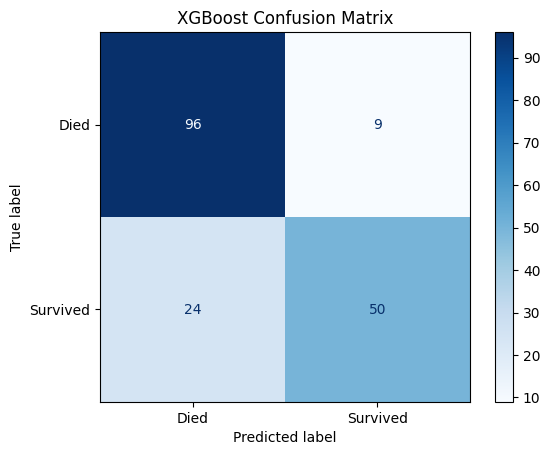

In [16]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

import matplotlib.pyplot as plt

val_predictions = model.predict(X_val)

print("Validation Accuracy:", accuracy_score(y_val, val_predictions))
print("\nClassification Report:\n", classification_report(y_val, val_predictions))

# Confusion Matrix
cm = confusion_matrix(y_val, val_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Died", "Survived"])
disp.plot(cmap=plt.cm.Blues)
plt.title("XGBoost Confusion Matrix")
plt.show()


In [17]:
final_predictions = model.predict(X_test)

output = pd.DataFrame({
    "PassengerId": test_data["PassengerId"],
    "Survived": final_predictions
})

output.to_csv("submission.csv", index=False)
print("Submission file created.")


Submission file created.
